# P14. Predicting Car Prices

In this project we will be applying some basic machine learning algorithm to predict a car's market price using its attribute. The dataset contains information about the technical aspects of several vehicles.


In [1]:
# reading the dataset

import pandas as pd
cars = pd.read_csv('imports-85.data', header=None)
cars.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
#fixing columns

cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspirations',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars.columns = cols
cars.head()
cars.iloc[0]

symboling                      3
normalized_losses              ?
make                 alfa-romero
fuel_type                    gas
aspirations                  std
num_doors                    two
body_style           convertible
drive_wheels                 rwd
engine_location            front
wheel_base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb_weight                 2548
engine_type                 dohc
num_cylinders               four
engine_size                  130
fuel_system                 mpfi
bore                        3.47
stroke                      2.68
compression_ratio              9
horsepower                   111
peak_rpm                    5000
city_mpg                      21
highway_mpg                   27
price                      13495
Name: 0, dtype: object

## Determine which columns are Numeric

In [3]:
num_columns = []

for i in cars.columns:
    if cars[i].dtype != object:
        num_columns.append(i)

num_columns

#in addition, num_doors and num_cylinders appear to be numeric. 
#the target column is 'Price'



['symboling',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'compression_ratio',
 'city_mpg',
 'highway_mpg']

## Data Cleaning

In [4]:
# replacing ? from 'normalized_losses' with numpy.nan

import numpy as np

cars['normalized_losses'] = cars['normalized_losses'].replace('?', np.nan)
cars = cars.replace('?', np.nan)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspirations,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars['normalized_losses'] = cars['normalized_losses'].astype('float')


for i in cars.columns:
    print (str(i) + ', ' + str(cars[i].dtype))


symboling, int64
normalized_losses, float64
make, object
fuel_type, object
aspirations, object
num_doors, object
body_style, object
drive_wheels, object
engine_location, object
wheel_base, float64
length, float64
width, float64
height, float64
curb_weight, int64
engine_type, object
num_cylinders, object
engine_size, int64
fuel_system, object
bore, object
stroke, object
compression_ratio, float64
horsepower, object
peak_rpm, object
city_mpg, int64
highway_mpg, int64
price, object


In [6]:
#determining number of rows with missing values
cars['normalized_losses'].isnull().sum()

41

In [7]:
## replacing missing values with the mean of column
cars['normalized_losses'] = cars['normalized_losses'].fillna(value=cars['normalized_losses'].mean())
cars['bore'] = cars['bore'].astype('float')
cars['stroke'] = cars['stroke'].astype('float')
cars['horsepower'] = cars['horsepower'].astype('float')
cars['peak_rpm'] = cars['peak_rpm'].astype('float')

cars.head()

## exploring other columns with missing values
cars.info(null_counts=True)
cars['price'] = cars['price'].replace('?', np.nan)
cars['price'] = cars['price'].astype('float')
cars['price'].describe()

# we dropped rows where price was missing
cars = cars.dropna()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspirations          205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

In [8]:
## normalizing the normalized_losses column with values ranging 
## from 0 to 1

cars.head()

,symboling,normalized_losses,make,fuel_type,aspirations,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
num_columns = []
for i in cars.columns:
    if cars[i].dtype != object:
        num_columns.append(i)

num_columns.remove('price')

def normalize(element):
    numerator = element - cars.min() 
    denominator = cars.max() - cars.min() 
    return numerator/denominator

cars[num_columns] = (cars[num_columns] - cars[num_columns].min())/(cars[num_columns].max() - cars[num_columns].min())
cars_num = cars[num_columns] 
cars_num['price'] = cars['price']
cars_num.head()




/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model 


In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features,target, df):
    size = df.shape[0]
    training_rows = int(size*0.5) 
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    training_df = rand_df.iloc[:training_rows]
    test_df = rand_df.iloc[training_rows:]
    knn = KNeighborsRegressor()
    knn.fit(training_df[[features]], training_df[target])
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(predictions, test_df[target])
    return mse**0.5

#test each column
rmses = []
for i in num_columns:
    rmses.append([knn_train_test(i, 'price', cars_num),i])

results = pd.Series(rmses)
sort_results = results.sort_values(ascending=True)
sort_results


7          [3256.7911913922107, engine_size]
13             [3365.690869842357, city_mpg]
6          [3743.0379850498143, curb_weight]
14          [4287.737055620871, highway_mpg]
11           [4819.382734441303, horsepower]
4                [4967.1498710678625, width]
2           [6030.6448230904825, wheel_base]
3                 [6355.43956580811, length]
5                [6584.669577538483, height]
10    [6831.894457072454, compression_ratio]
8                  [6936.225732274877, bore]
0             [7440.953488619171, symboling]
1     [7744.859556911841, normalized_losses]
9                [8009.250604273901, stroke]
12             [8171.480619990884, peak_rpm]
dtype: object

From the results above, we can see that engine_size appears to have the lowest RMSE. 

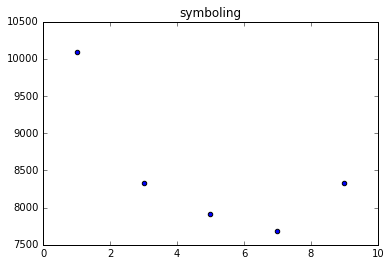

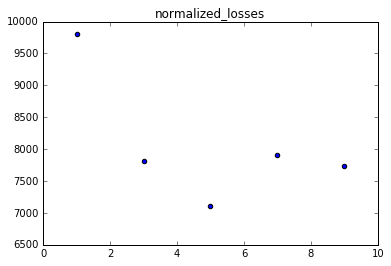

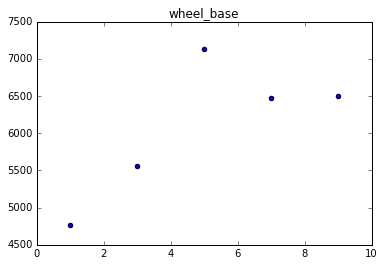

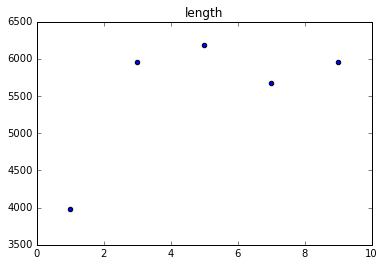

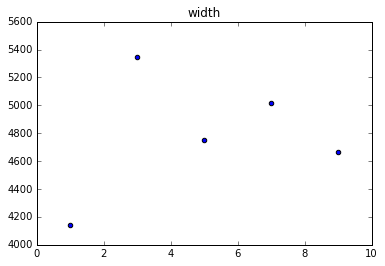

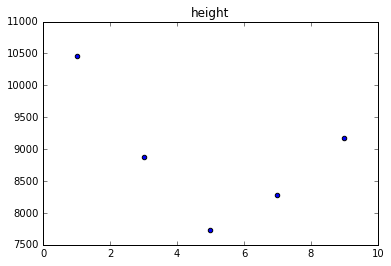

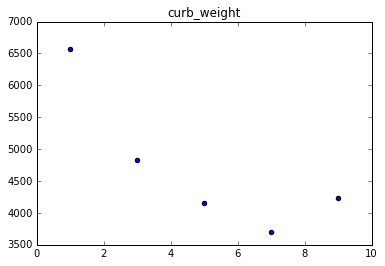

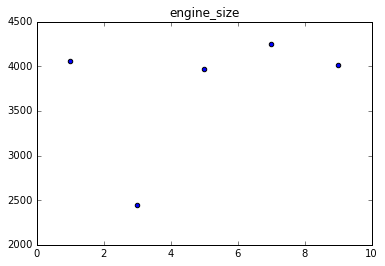

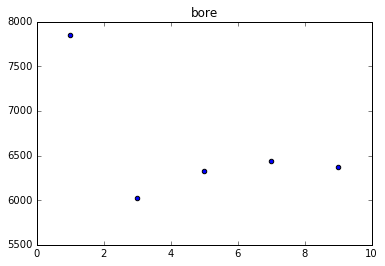

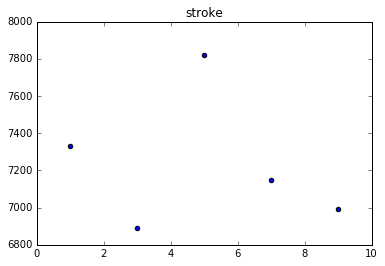

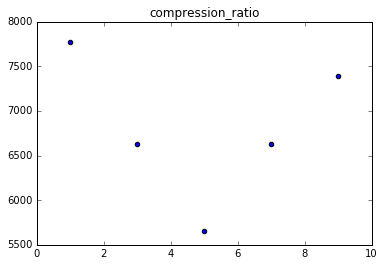

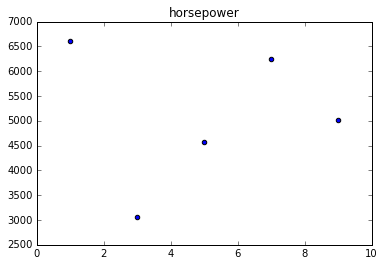

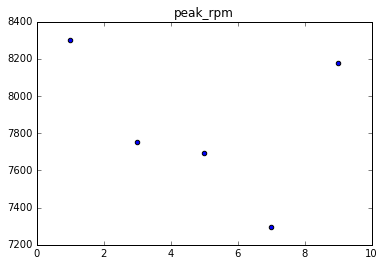

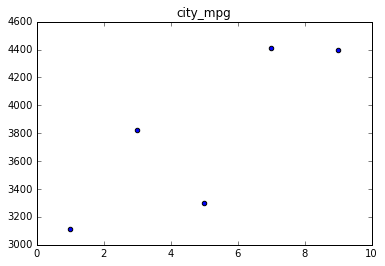

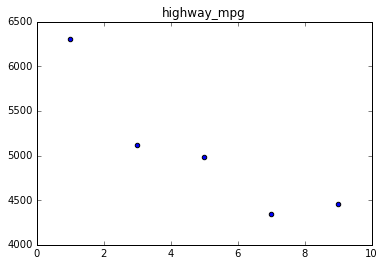

In [70]:
##Let's test for different k hyperparameter

def knn_train_test(features,target, df, k):
    size = df.shape[0]
    training_rows = int(size*0.5)    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    training_df = rand_df.iloc[:training_rows]
    test_df = rand_df.iloc[training_rows:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(training_df[[features]], training_df[target])
    predictions = knn.predict(test_df[[features]])
    mse = mean_squared_error(predictions, test_df[target])
    return mse**0.5

import matplotlib.pyplot as plt
%matplotlib inline
#test each column
for i in num_columns:
    rmse = []
    for k in [1,3,5,7,9]:
        rmse.append(knn_train_test(i, 'price', cars_num, k))
    plt.scatter(x=[1,3,5,7,9], y=rmse)
    plt.title(i)
    plt.show()

We can see that as we vary the k parameter (n_neighbors) the value of RMSE varies. 

## Multivariate Model 

In [78]:
def knn_train_test(features,target, df):
    size = df.shape[0]
    training_rows = int(size*0.5) 
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    training_df = rand_df.iloc[:training_rows]
    test_df = rand_df.iloc[training_rows:]
    knn = KNeighborsRegressor()
    knn.fit(training_df[features], training_df[target])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df[target])
    return mse**0.5
sort_results

features2 = ['engine_size', 'city_mpg']
rmse2 = knn_train_test(features2, 'price', cars_num)
print('two features ' + str(rmse2))

features3 = ['engine_size','city_mpg', 'curb_weight']
rmse3 = knn_train_test(features3, 'price', cars_num)
print('three features ' + str(rmse3))

features4 = ['engine_size','city_mpg', 'curb_weight', 'highway_mpg']
rmse4 = knn_train_test(features4, 'price', cars_num)
print('four features ' + str(rmse4))

features5 = ['engine_size' ,'city_mpg', 'curb_weight', 'highway_mpg', 'horsepower']
rmse5 = knn_train_test(features5, 'price', cars_num)
print('five features ' + str(rmse5))



two features 3044.6362569803946
three features 3143.5029491540495
four features 2920.385591897211
five features 3225.156229828894


In [102]:
## Fine Tuning the Hyperparameter

def knn_train_test(features,target, df, k):
    size = df.shape[0]
    np.random.seed(1)
    training_rows = int(size*0.5)    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    training_df = rand_df.iloc[:training_rows]
    test_df = rand_df.iloc[training_rows:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(training_df[features], training_df[target])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df[target])
    return mse**0.5

import matplotlib.pyplot as plt
%matplotlib inline

rmse_results = {}
features2 = ['engine_size', 'city_mpg']
rmse=[]
for k in range(1,26):
    rmse.append(knn_train_test(features2, 'price', cars_num, k))
    rmse_results['features2'] = rmse

features3 = ['engine_size','city_mpg', 'curb_weight']
rmse=[]
for k in range(1,26):
    rmse.append(knn_train_test(features3, 'price', cars_num, k))
    rmse_results['features3'] = rmse

features4 = ['engine_size','city_mpg', 'curb_weight', 'highway_mpg']
rmse=[]
for k in range(1,26):
    rmse.append(knn_train_test(features4, 'price', cars_num, k))
    rmse_results['features4'] = rmse

rmse_results

{'features2': [3283.5609394830744,
  2810.559038843472,
  2884.273626350478,
  3205.956709722295,
  3345.300791062055,
  3467.0973682932035,
  3776.3662101003542,
  3947.2182629828058,
  4147.355953141936,
  4330.426664736374,
  4459.753282771168,
  4431.197753146592,
  4485.366337217043,
  4606.087036688948,
  4686.3701174723865,
  4744.666394849414,
  4750.900886903952,
  4757.993077679204,
  4863.560980363594,
  4965.262090984216,
  5010.968392952914,
  5019.33615814639,
  5093.034169443363,
  5144.637679742976,
  5189.084621986433],
 'features3': [2845.207718034465,
  2790.579354546403,
  3054.9455954346045,
  3424.025574099532,
  3682.0462016846295,
  3969.3795360848417,
  4068.0186033556993,
  4284.853722004465,
  4493.4248488589565,
  4581.427122171998,
  4544.125120284567,
  4540.442322556745,
  4535.9660209736,
  4557.115779930961,
  4649.579869828096,
  4678.602104064376,
  4711.281554629307,
  4813.03080165143,
  4908.649293327492,
  4946.867834598948,
  5006.539941646018,
 

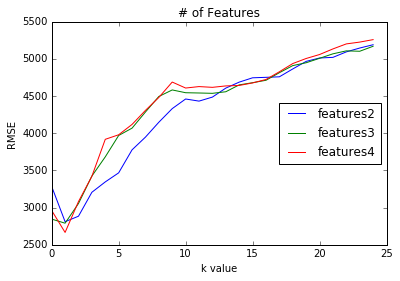

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rmse_results['features2'])
plt.plot(rmse_results['features3'])
plt.plot(rmse_results['features4'])
plt.legend(['features2', 'features3', 'features4'], loc=5)
plt.title('# of Features')
plt.ylabel('RMSE')
plt.xlabel('k value')

#plt.legend(['features2', 'features3', 'features4'])

#for k,v in rmse_results.items():
#    plt.plot(v, label=k)
#    plt.xlabel('k value')
#    plt.ylabel('RMSE')
    
#plt.title('# of Features')
#plt.legend(loc=5)
